<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=200 height=200 align=left class="saturate" >

<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Introduction to Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2022<br>
<font color=3C99D size=5>
    Homework 3: Practical - Neural Network <br>
<font color=696880 size=4>
    Alireza Belal
    
    
____


### Full Name : Mohammad Jamshidi
### Student Number : 98100718
___

# Setup

# 0. Preparation

In this part, you will use a dataset related to COVID-19. Load your dataset using pandas.

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
covid_data = pd.read_csv('Covid Dataset.csv')
categorical_feature_mask = covid_data.dtypes == object
cateforical_cols = covid_data.columns[categorical_feature_mask].tolist()
le = LabelEncoder()
covid_data[cateforical_cols] = covid_data[cateforical_cols].apply(lambda col: le.fit_transform(col))
covid_data = covid_data.astype(float)

# Extract X and Y from the dataset
X_total = covid_data.iloc[:, 0:20].values
y_total = covid_data.iloc[:,20].values


#SPLIT THE DATA INTO TRAIN AND TEST DATA 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_total, y_total, test_size = 0.3, random_state = 0)

In [40]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X_train[0])

(3803, 20)
(1631, 20)
(3803,)
(1631,)
[1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.]


---------------

# 1. DNN as nonlinear dimensionality reduction method (50 Points)

Autoencoder is an unsupervised artificial neural network that compresses the data to lower dimension and then reconstructs the input back. Autoencoder finds the representation of the data in a lower dimension by focusing more on the important features getting rid of noise and redundancy. It's based on Encoder-Decoder architecture, where encoder encodes the high-dimensional data to lower-dimension and decoder takes the lower-dimensional data and tries to reconstruct the original high-dimensional data.

![picture](https://drive.google.com/uc?id=1RTZwx4xL6zFV_nUENBgWlFKLKldPoyI-)

In the above Diagram, X is the input data, z is the lower-dimension representation of input X and X’ is the reconstructed input data. The mapping of higher to lower dimensions can be linear or non-linear depending on the choice of the activation function.

In this part you're gonna implement an autoencoder using Keras framework as dimensionally reduction module as explained [here](https://blog.keras.io/building-autoencoders-in-keras.html).
(It would be ok to use PyTorch as well.)
Reduce the dimension of the data to 2 dimensions and visualize the low-dimensional data.

In [114]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.losses import MeanAbsoluteError

In [166]:
# define layers (25 Points)
# input_dim = X_train.shape[1]
# encoding_dim = 2
# input_layer = Input(shape=(input_dim, ))
# encd1 = Dense(input_dim, activation='relu')(input_layer)
# encd2 = Dense(15, activation='relu')(encd1)
# encd3 = Dense(10, activation='relu')(encd2)
# encd4 = Dense(5, activation='relu')(encd3)
# latent = Dense(encoding_dim, activation='relu')(encd4)
# decd1 = Dense(5, activation='relu')(latent)
# decd2 = Dense(10, activation='relu')(decd1)
# decd3 = Dense(15, activation='relu')(decd2)
# decd4 = Dense(input_dim, activation='sigmoid')(decd3)
# autoencoder = Model(inputs = input_layer, outputs = decd4)



# define layers (25 Points)
input_dim = X_train.shape[1]
encoding_dim = 2
input_layer = Input(shape=(input_dim, ))
encd1 = Dense(10, activation='gelu')(input_layer)
encd2 = Dense(5, activation='relu')(encd1)
latent = Dense(encoding_dim, activation='relu')(encd2)
decd1 = Dense(5, activation='relu')(latent)
decd2 = Dense(10, activation='relu')(decd1)
decd3 = Dense(input_dim, activation='sigmoid')(decd2)
autoencoder = Model(inputs = input_layer, outputs = decd3)




# input_dim = X_train.shape[1]
# encoding_dim = 2
# input_layer = Input(shape=(input_dim, ))
# encd1 = Dense(input_dim, activation='selu')(input_layer)
# encd2 = Dense(18, activation='selu')(encd1)
# encd3 = Dense(16, activation='selu')(encd2)
# encd4 = Dense(14, activation='selu')(encd3)
# encd5 = Dense(12, activation='selu')(encd4)
# encd6 = Dense(10, activation='selu')(encd5)
# encd7 = Dense(8, activation='selu')(encd6)
# encd8 = Dense(6, activation='selu')(encd7)
# encd9 = Dense(4, activation='selu')(encd8)
# latent = Dense(encoding_dim, activation='selu')(encd9)
# decd1 = Dense(4, activation='selu')(latent)
# decd2 = Dense(6, activation='selu')(decd1)
# decd3 = Dense(8, activation='selu')(decd2)
# decd4 = Dense(10, activation='selu')(decd3)
# decd5 = Dense(12, activation='selu')(decd4)
# decd6 = Dense(14, activation='selu')(decd5)
# decd7 = Dense(16, activation='selu')(decd6)
# decd8 = Dense(18, activation='selu')(decd7)
# decd9 = Dense(input_dim, activation='sigmoid')(decd8)
# autoencoder = Model(inputs = input_layer, outputs = decd9)

In [165]:
# train the model and reduce the dimension of the data (15 Points)
epochs = 200
autoencoder.compile(optimizer = Adam(learning_rate=1e-3), loss = MeanSquaredError())
hist = autoencoder.fit(X_train, X_train, epochs = epochs, batch_size = 64, shuffle = False,
 validation_data = (X_test, X_test), initial_epoch=0)
loss_per_epoch = hist.history['loss']
print(loss_per_epoch)

Epoch 1/200
60/60 [==============================] - 2s 5ms/step - loss: 0.1875 - val_loss: 0.1964
Epoch 2/200
60/60 [==============================] - 0s 3ms/step - loss: 0.1878 - val_loss: 0.1962
Epoch 3/200
60/60 [==============================] - 0s 4ms/step - loss: 0.1874 - val_loss: 0.1958
Epoch 4/200
60/60 [==============================] - 0s 4ms/step - loss: 0.1873 - val_loss: 0.1955
Epoch 5/200
60/60 [==============================] - 0s 3ms/step - loss: 0.1873 - val_loss: 0.1954
Epoch 6/200
60/60 [==============================] - 0s 4ms/step - loss: 0.1870 - val_loss: 0.1952
Epoch 7/200
60/60 [==============================] - 0s 4ms/step - loss: 0.1867 - val_loss: 0.1954
Epoch 8/200
60/60 [==============================] - 0s 3ms/step - loss: 0.1867 - val_loss: 0.1950
Epoch 9/200
60/60 [==============================] - 0s 4ms/step - loss: 0.1868 - val_loss: 0.1948
Epoch 10/200
60/60 [==============================] - 0s 3ms/step - loss: 0.1866 - val_loss: 0.1950
Epoch 11/

KeyboardInterrupt: 

Text(0, 0.5, 'Loss Value')

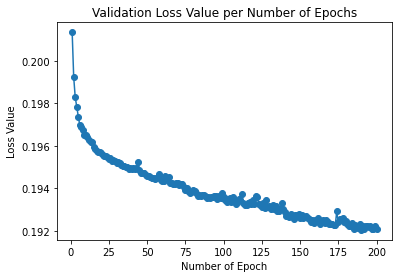

In [159]:
fig, ax = plt.subplots()
epochs = np.array([i+1 for i in range(epochs)])
ax.plot(epochs, loss_per_epoch, '-o')
ax.set_title('Validation Loss Value per Number of Epochs')
ax.set_xlabel('Number of Epoch')
ax.set_ylabel('Loss Value')

In [160]:
encoder = Model(inputs = input_layer, outputs= latent)
encoded_input = Input(shape = (encoding_dim, ))
encoded_train = pd.DataFrame(encoder.predict(X_train))
encoded_test = pd.DataFrame(encoder.predict(X_test))

51/51 [==============================] - 0s 1ms/step


In [161]:
predicted_X_train = autoencoder(X_train)
# print(predicted_X_train[7])
# print(predicted_X_train.shape)
# print(X_train.shape)


tf.Tensor(
[[3.2472074e-30 2.3357894e-02 1.0000000e+00 1.7470484e-27 4.2222597e-19
  8.8114394e-10 1.0000000e+00 2.4947622e-05 9.9999976e-01 2.9946646e-05
  1.4856901e-27 1.3640408e-15 1.0000000e+00 1.5194813e-23 0.0000000e+00
  0.0000000e+00 1.3842362e-17 1.7028894e-21 0.0000000e+00 0.0000000e+00]
 [8.9761478e-01 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00
  0.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00 9.9999678e-01
  1.0000000e+00 1.5300079e-17 9.9999988e-01 1.0394133e-11 9.9925280e-01
  2.5011759e-04 1.0000000e+00 1.1142994e-04 0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00 2.5073398e-14
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 5.0823331e-07
  4.0902153e-27 1.0000000e+00 0.0000000e+00 1.0000000e+00 1.0000000e+00
  1.0000000e+00 1.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00 9.9999911e-01
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000

              0          1
0      1.163220   4.762868
1     15.118462   0.000000
2     47.616325  16.253077
3     48.697876  14.709255
4     22.524694   7.652384
...         ...        ...
3798   0.000000   2.861007
3799  20.537453  14.700619
3800  27.684927  13.980925
3801  25.407015  13.096668
3802  12.918259   1.428163

[3803 rows x 2 columns]


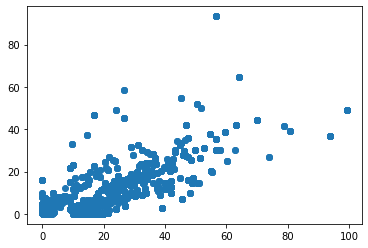

In [162]:
print(encoded_train)
# print(encoded_test)
plt.scatter(encoded_train[:][0], encoded_train[:][1])
plt.show()

In [5]:
# Plot the encoded data (10 Points)